In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import struct
from collections import defaultdict

In [ ]:
data = pd.read_csv("data.csv")

s = str(data["b'radar_primary_yson_msg'"][0])
with open("cell.json", "w") as file:
    file.write(s)

d1 = list(
    map(int, data["b'radar_primary_data'"][0][1:-1].split(", "))
)  # b'radar_primary_data'
d3 = list(
    map(int, data["b'radar_primary_list'"][0][1:-1].split(", "))
)  # b'radar_primary_list'

print(d1  == d3)
data

True


,b'ride_date',b'rover',b'radar_secondary_list',b'radar_secondary_data',b'message_ts',b'radar_primary_data',b'radar_secondary_yson_msg',b'/radar/front_primary',b'msg_definition/radar/front_primary',b'radar_primary_yson_msg',b'log_time',b'ride_time',b'radar_primary_list'
0,b'2025-01-23',b'matar',"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...","[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...",1737591862924763665,"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...","{b'row_step': 960, b'height': 1, b'fields': [{...",b'\xbd\x8d\x01\x006\x8c\x91g\x86\x0fL*\x13\x00...,b'Header header\nuint32 height\nuint32 width\n...,"{b'row_step': 960, b'height': 1, b'fields': [{...",b'03:21:12',b'01:18:21',"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,..."
1,b'2025-01-23',b'matar',"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...","[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...",1737591862996971126,"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...","{b'row_step': 960, b'height': 1, b'fields': [{...",b'\xbe\x8d\x01\x006\x8c\x91g\xc2\xd8\xc4.\x13\...,b'Header header\nuint32 height\nuint32 width\n...,"{b'row_step': 960, b'height': 1, b'fields': [{...",b'03:21:12',b'01:18:21',"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0..."
2,b'2025-01-23',b'matar',"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...","[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...",1737591863073786978,"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...","{b'row_step': 1024, b'height': 1, b'fields': [...","b'\xbf\x8d\x01\x006\x8c\x91g""\x83=3\x13\x00\x0...",b'Header header\nuint32 height\nuint32 width\n...,"{b'row_step': 1024, b'height': 1, b'fields': [...",b'03:21:12',b'01:18:21',"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0..."
3,b'2025-01-23',b'matar',"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...","[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...",1737591863144770469,"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...","{b'row_step': 1024, b'height': 1, b'fields': [...",b'\xc0\x8d\x01\x006\x8c\x91g\x82\xf2i7\x13\x00...,b'Header header\nuint32 height\nuint32 width\n...,"{b'row_step': 1024, b'height': 1, b'fields': [...",b'03:21:12',b'01:18:21',"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0..."
4,b'2025-01-23',b'matar',"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...","[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...",1737591863213517922,"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0...","{b'row_step': 896, b'height': 1, b'fields': [{...",b'\xc1\x8d\x01\x006\x8c\x91g\x92s\x98;\x13\x00...,b'Header header\nuint32 height\nuint32 width\n...,"{b'row_step': 896, b'height': 1, b'fields': [{...",b'03:21:12',b'01:18:21',"[102, 102, 134, 65, 205, 204, 140, 63, 0, 0, 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,b'2025-01-23',b'matar',"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...","[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...",1737591869814745323,"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...","{b'row_step': 1024, b'height': 1, b'fields': [...","b""\x1c\x8e\x01\x00=\x8c\x91g\xaeO\xdb#\x13\x00...",b'Header header\nuint32 height\nuint32 width\n...,"{b'row_step': 1024, b'height': 1, b'fields': [...",b'03:21:12',b'01:18:21',"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,..."
96,b'2025-01-23',b'matar',"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...","[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...",1737591869892168216,"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...","{b'row_step': 1024, b'height': 1, b'fields': [...",b'\x1d\x8e\x01\x00=\x8c\x91gZ&T(\x13\x00\x00\x...,b'Header header\nuint32 height\nuint32 width\n...,"{b'row_step': 1024, b'height': 1, b'fields': [...",b'03:21:12',b'01:18:21',"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,..."
97,b'2025-01-23',b'matar',"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...","[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...",1737591869959417162,"[0, 0, 136, 65, 205, 204, 140, 63, 0, 0, 0, 0,...","{b'row_step': 960, b'height': 1, b'fields': [{...","b'\x1e\x8e\x01\x00=\x8c\x91gRV\x82,\x13\x00\

In [90]:
datatypes = {7: 4, 1: 1}
point_step = 64
tags_raw = (
    {b"name": "x", b"datatype": 7, b"count": 1, b"offset": 0},
    {b"name": "y", b"datatype": 7, b"count": 1, b"offset": 4},
    {b"name": "z", b"datatype": 7, b"count": 1, b"offset": 8},
    {b"name": "obj_vrel_long", b"datatype": 7, b"count": 1, b"offset": 12},
    {b"name": "obj_lat_speed", b"datatype": 7, b"count": 1, b"offset": 16},
    {b"name": "obj_rcs_value", b"datatype": 7, b"count": 1, b"offset": 20},
    {b"name": "radial_speed_absolute", b"datatype": 7, b"count": 1, b"offset": 24},
    {b"name": "distance_accuracy", b"datatype": 7, b"count": 1, b"offset": 28},
    {b"name": "angle_accuracy", b"datatype": 7, b"count": 1, b"offset": 32},
    {b"name": "pdh0", b"datatype": 7, b"count": 1, b"offset": 36},
    {b"name": "dist_long_rms", b"datatype": 7, b"count": 1, b"offset": 40},
    {b"name": "dist_lat_rms", b"datatype": 7, b"count": 1, b"offset": 44},
    {b"name": "v_long_rms", b"datatype": 7, b"count": 1, b"offset": 48},
    {b"name": "v_lat_rms", b"datatype": 7, b"count": 1, b"offset": 52},
    {b"name": "dyn_prop", b"datatype": 1, b"count": 1, b"offset": 56},
    {b"name": "range", b"datatype": 1, b"count": 1, b"offset": 57},
    {b"name": "has_quality", b"datatype": 1, b"count": 1, b"offset": 58},
    {b"name": "invalid", b"datatype": 1, b"count": 1, b"offset": 60},
    {b"name": "ambig", b"datatype": 1, b"count": 1, b"offset": 59},
)
tags = {i[b"name"]: (datatypes[i[b"datatype"]], i[b"offset"]) for i in tags_raw}


tags

{'x': (4, 0),
 'y': (4, 4),
 'z': (4, 8),
 'obj_vrel_long': (4, 12),
 'obj_lat_speed': (4, 16),
 'obj_rcs_value': (4, 20),
 'radial_speed_absolute': (4, 24),
 'distance_accuracy': (4, 28),
 'angle_accuracy': (4, 32),
 'pdh0': (4, 36),
 'dist_long_rms': (4, 40),
 'dist_lat_rms': (4, 44),
 'v_long_rms': (4, 48),
 'v_lat_rms': (4, 52),
 'dyn_prop': (1, 56),
 'range': (1, 57),
 'has_quality': (1, 58),
 'invalid': (1, 60),
 'ambig': (1, 59)}

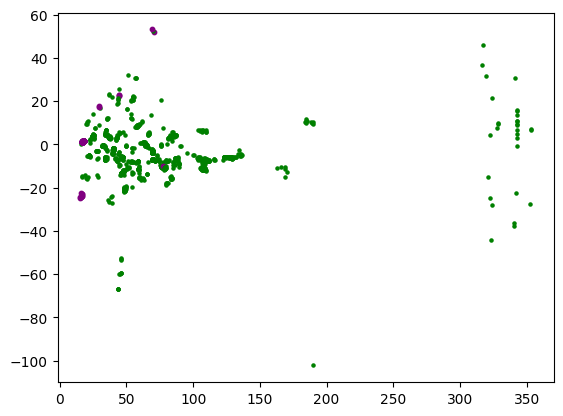

In [114]:
for i, date_i in enumerate(data["b'radar_primary_list'"]):
    # print(date_i)
    raw_dots = bytes(list(map(int, date_i[1:-1].split(", "))))
    parsed = defaultdict(list)
    for j in range(len(raw_dots) // 64):
        for tag_key, (tag_len, tag_offs) in tags.items():
            match tag_len:
                case 4:
                    parsed[tag_key].append(
                        struct.unpack(
                            "f",
                            raw_dots[j * 64 + tag_offs : j * 64 + tag_offs + tag_len],
                        )
                    )
                case 1:
                    parsed[tag_key].append(
                        raw_dots[
                            j * 64 + tag_offs : j * 64 + tag_offs + tag_len
                        ].decode()
                    )
    pdh0_75 = [i == (0.75,) for i in parsed["pdh0"]]
    plt.scatter(
        np.array(parsed["x"])[pdh0_75],
        np.array(parsed["y"])[pdh0_75],
        color="green",
        s=5,
    )
    pdh0_25 = [not i for i in pdh0_75]
    plt.scatter(
        np.array(parsed["x"])[pdh0_25],
        np.array(parsed["y"])[pdh0_25],
        color="purple",
        s=10,
    )


plt.show()